In [4]:
# !pip install datasets

In [135]:
from datasets import load_dataset

ds = load_dataset("openlifescienceai/mmlu_anatomy")

In [31]:
ds

DatasetDict({
    test: Dataset({
        features: ['subject_name', 'data', 'id'],
        num_rows: 135
    })
    validation: Dataset({
        features: ['subject_name', 'data', 'id'],
        num_rows: 14
    })
    dev: Dataset({
        features: ['subject_name', 'data', 'id'],
        num_rows: 5
    })
})

In [136]:
dft = ds['test'].to_pandas()
dfv = ds['validation'].to_pandas()
dfd = ds['dev'].to_pandas()

In [35]:
dft

,subject_name,data,id
0,anatomy,{'Correct Answer': 'paralysis of the facial mu...,f79cc804-61f3-4456-98af-7fcbe2227d22
1,anatomy,{'Correct Answer': 'a recessive maxilla due to...,57a7ec13-0022-422a-80bb-92c0366065b3
2,anatomy,"{'Correct Answer': 'Bladder', 'Correct Option'...",2c3f33fc-8cfe-4036-9adf-b859cd9dd203
3,anatomy,"{'Correct Answer': 'Melanocytes', 'Correct Opt...",1d309a06-dfbd-4d60-bcc9-7bb13bcea1cd
4,anatomy,"{'Correct Answer': 'Glomerulus', 'Correct Opti...",6e19f938-cdbd-4a16-93ce-25daba7c6965
...,...,...,...
130,anatomy,{'Correct Answer': 'sensory neuronal processes...,2e9c39ec-88f9-4c35-a1bb-f0f3dc31ca5a
131,anatomy,"{'Correct Answer': 'Pituitary', 'Correct Optio...",2c54e4ef-1755-44ce-8029-74982d3882d5
132,anatomy,{'Correct Answer': 'lingual branch of the mand...,d9154e22-dad0-4edf-ab8b-323afcd45f92
133,anatomy,"{'Correct Answer': 'Urethra', 'Correct Option'...",65c8991e-6e59-4e93-bbb5-b5bc88cf91b5


In [137]:
from pprint import pprint

pprint(dft.iloc[0].data, sort_dicts=False)

{'Correct Answer': 'paralysis of the facial muscles.',
 'Correct Option': 'A',
 'Options': {'A': 'paralysis of the facial muscles.',
             'B': 'paralysis of the facial muscles and loss of taste.',
             'C': 'paralysis of the facial muscles, loss of taste and '
                  'lacrimation.',
             'D': 'paralysis of the facial muscles, loss of taste, lacrimation '
                  'and decreased salivation.'},
 'Question': 'A lesion causing compression of the facial nerve at the '
             'stylomastoid foramen will cause ipsilateral'}


In [37]:
dft.columns

Index(['subject_name', 'data', 'id'], dtype='object')

In [38]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subject_name  135 non-null    object
 1   data          135 non-null    object
 2   id            135 non-null    object
dtypes: object(3)
memory usage: 3.3+ KB


In [39]:
type(dft.iloc[0].data)

dict

In [40]:
import pandas as pd
import copy

# Function to split data
def process_data(row):
    # Deep copy to avoid modifying original dictionary
    ques_data = copy.deepcopy(row['data'])

    # Extract correct answer and option
    correct_data = {
        "id": row["id"],
        "Correct Answer": ques_data.pop("Correct Answer", None),
        "Correct Option": ques_data.pop("Correct Option", None)
    }

    # Return modified question data and correct data separately
    return ques_data, correct_data

# Apply the function to the dataframe
dft[['processed_data', 'correct_data']] = dft.apply(process_data, axis=1, result_type="expand")

# Create new dataframes
dfq = dft[['subject_name', 'id', 'processed_data']].rename(columns={'processed_data': 'data'})
dfa = pd.DataFrame(dft['correct_data'].tolist())

In [41]:
dfq

,subject_name,id,data
0,anatomy,f79cc804-61f3-4456-98af-7fcbe2227d22,{'Options': {'A': 'paralysis of the facial mus...
1,anatomy,57a7ec13-0022-422a-80bb-92c0366065b3,{'Options': {'A': 'a protruding mandible due t...
2,anatomy,2c3f33fc-8cfe-4036-9adf-b859cd9dd203,"{'Options': {'A': 'Bladder', 'B': 'Kidney', 'C..."
3,anatomy,1d309a06-dfbd-4d60-bcc9-7bb13bcea1cd,"{'Options': {'A': 'Motor neurons', 'B': 'Skele..."
4,anatomy,6e19f938-cdbd-4a16-93ce-25daba7c6965,"{'Options': {'A': 'Afferent arteriole', 'B': '..."
...,...,...,...
130,anatomy,2e9c39ec-88f9-4c35-a1bb-f0f3dc31ca5a,{'Options': {'A': 'sensory neuronal processes....
131,anatomy,2c54e4ef-1755-44ce-8029-74982d3882d5,"{'Options': {'A': 'Adrenal', 'B': 'Pancreas', ..."
132,anatomy,d9154e22-dad0-4edf-ab8b-323afcd45f92,{'Options': {'A': 'lingual branch of the mandi...
133,anatomy,65c8991e-6e59-4e93-bbb5-b5bc88cf91b5,"{'Options': {'A': 'Anus', 'B': 'Bladder', 'C':..."


In [44]:
pprint(dfq.iloc[0].data, sort_dicts=False)

{'Options': {'A': 'paralysis of the facial muscles.',
             'B': 'paralysis of the facial muscles and loss of taste.',
             'C': 'paralysis of the facial muscles, loss of taste and '
                  'lacrimation.',
             'D': 'paralysis of the facial muscles, loss of taste, lacrimation '
                  'and decreased salivation.'},
 'Question': 'A lesion causing compression of the facial nerve at the '
             'stylomastoid foramen will cause ipsilateral'}


In [42]:
dfa

,id,Correct Answer,Correct Option
0,f79cc804-61f3-4456-98af-7fcbe2227d22,paralysis of the facial muscles.,A
1,57a7ec13-0022-422a-80bb-92c0366065b3,a recessive maxilla due to failure of elongati...,B
2,2c3f33fc-8cfe-4036-9adf-b859cd9dd203,Bladder,A
3,1d309a06-dfbd-4d60-bcc9-7bb13bcea1cd,Melanocytes,C
4,6e19f938-cdbd-4a16-93ce-25daba7c6965,Glomerulus,B
...,...,...,...
130,2e9c39ec-88f9-4c35-a1bb-f0f3dc31ca5a,sensory neuronal processes.,A
131,2c54e4ef-1755-44ce-8029-74982d3882d5,Pituitary,D
132,d9154e22-dad0-4edf-ab8b-323afcd45f92,lingual branch of the mandibular trigeminal ne...,A
133,65c8991e-6e59-4e93-bbb5-b5bc88cf91b5,Urethra,C


In [47]:
pprint(dft.iloc[0].correct_data, sort_dicts=False)

{'id': 'f79cc804-61f3-4456-98af-7fcbe2227d22',
 'Correct Answer': 'paralysis of the facial muscles.',
 'Correct Option': 'A'}


In [43]:
dfa['Correct Option'].value_counts()

,count
Correct Option,
C,45
B,34
D,31
A,25


In [53]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 3.6 MB/s eta 0:00:00


In [66]:
from groq import Groq
from google.colab import userdata

api_key = userdata.get('groq_api_key')
client = Groq(api_key=api_key)

def get_llm_res(ques_data):
  system_prompt = (
      """
      You are an expert biomedical AI assistant specializing in human anatomy, physiology, and medical science. You have comprehensive knowledge of:
      - Anatomical structures and their relationships
      - Neuroanatomy and nerve pathways
      - Physiological systems and their functions
      - Clinical manifestations of anatomical lesions
      - Pathophysiology of medical conditions

      You will receive questions in a specific format containing:
      1. A medical scenario or clinical question
      2. Multiple choice options labeled A through D

      Input Format Example:
      {
          'Options': {
              'A': [Option A text],
              'B': [Option B text],
              'C': [Option C text],
              'D': [Option D text]
          },
          'Question': [Question text]
      }

      You must:
      1. Carefully analyze the question and each option
      2. Use your medical expertise to determine the most accurate answer
      3. Respond ONLY in the following JSON format:
      {
          "Correct Answer": ["Full text of the correct option, in double quotes"],
          "Correct Option": [Letter of the correct option ("A", "B", "C", or "D")]
      }

      Important Guidelines:
      - Provide ONLY the answer in the specified JSON format
      - Do not include explanations, reasoning, or additional commentary
      - Do not modify the response format or add additional fields
      - Make sure the keys are enclosed in double quatations to ensure proper json decoding
      - Ensure the "Correct Answer" exactly matches the text from the selected option
      - Ensure the "Correct Option" is a single uppercase letter (A, B, C, or D)
      - Be precise and accurate in your medical knowledge
      - Consider the specific anatomical location and clinical implications mentioned in questions

      Your role is to serve as a reliable source of anatomical and medical knowledge while strictly adhering to the specified input/output format requirements.
      """
    )

  user_prompt = (f"{ques_data}")

  messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt}
      ]

  response = client.chat.completions.create(
      model="llama-3.3-70b-versatile",
      messages=messages,
      max_tokens=1024,
      temperature=0.3
  )

  return response.choices[0].message.content


In [138]:
dft.iloc[44].data

{'Correct Answer': 'internal laryngeal nerve which is the afferent limb of the cough reflex.',
 'Correct Option': 'A',
 'Options': {'A': 'internal laryngeal nerve which is the afferent limb of the cough reflex.',
  'B': 'external laryngeal nerve which is the afferent limb of the gag reflex.',
  'C': 'internal laryngeal nerve which is the afferent limb of the gag reflex.',
  'D': 'external laryngeal nerve which is the afferent limb of the cough reflex.'},
 'Question': 'The mucosa of the upper larynx is innervated by the'}

In [85]:
sampq = dfq.iloc[44].data

In [139]:
llm_ans = get_llm_res(sampq)

In [87]:
llm_ans

'{\n"Correct Answer": "internal laryngeal nerve which is the afferent limb of the cough reflex.",\n"Correct Option": "A"\n}'

In [82]:
import json

llmres = json.loads(llm_ans)

In [140]:
llmres["Correct Option"]

'A'

In [88]:
import json
import time
from typing import Dict, Optional

def get_valid_llm_response(question: Dict, max_retries: int = 3, delay: float = 1.0) -> Optional[Dict]:
    """
    Repeatedly attempt to get a valid JSON response from the LLM until successful
    or max retries reached.

    Args:
        question (Dict): The question dictionary to send to LLM
        max_retries (int): Maximum number of retry attempts
        delay (float): Delay in seconds between retries

    Returns:
        Dict or None: Parsed JSON response if successful, None if all retries fail
    """
    for attempt in range(max_retries):
        try:
            # Get response from LLM
            response = get_llm_res(question)

            # Try to parse JSON
            parsed_response = json.loads(response)

            # Verify required keys exist
            if "Correct Option" in parsed_response:
                return parsed_response

        except json.JSONDecodeError:
            print(f"Attempt {attempt + 1}: Invalid JSON received")
        except KeyError:
            print(f"Attempt {attempt + 1}: Response missing required keys")
        except Exception as e:
            print(f"Attempt {attempt + 1}: Unexpected error: {str(e)}")

        # Wait before retrying if this wasn't the last attempt
        if attempt < max_retries - 1:
            time.sleep(delay)

    return None

# Process the dataframe
llm_answers = []

for index, row in dfq.iterrows():
    ques = row.data
    response = get_valid_llm_response(ques, delay=2.0)

    if response:
        llm_answers.append({
            "id": row.id,
            "llm_option": response["Correct Option"]
        })
    else:
        print(f"Failed to get valid response for question ID: {row.id}")
        # Optionally append a placeholder or skip this entry
        llm_answers.append({
            "id": row.id,
            "llm_option": None  # or some default value
        })

In [90]:
llm_answers

[{'id': 'f79cc804-61f3-4456-98af-7fcbe2227d22', 'llm_option': 'A'},
 {'id': '57a7ec13-0022-422a-80bb-92c0366065b3', 'llm_option': 'B'},
 {'id': '2c3f33fc-8cfe-4036-9adf-b859cd9dd203', 'llm_option': 'B'},
 {'id': '1d309a06-dfbd-4d60-bcc9-7bb13bcea1cd', 'llm_option': 'A'},
 {'id': '6e19f938-cdbd-4a16-93ce-25daba7c6965', 'llm_option': 'B'},
 {'id': '1c26a02f-53fa-451f-b075-9e82f2a82700', 'llm_option': 'A'},
 {'id': 'f860cd65-23fc-4c17-b179-c33daa9110b4', 'llm_option': 'A'},
 {'id': '298f1437-bb07-4f6d-b886-1cac02207da0', 'llm_option': 'B'},
 {'id': 'b4f76a17-e33d-4cf9-8504-36fbe262aae0', 'llm_option': 'B'},
 {'id': 'f716bf78-5d05-4997-8531-1e48ad66357a', 'llm_option': 'A'},
 {'id': '45c6bd44-be5a-4258-b497-702bb90a8826', 'llm_option': 'D'},
 {'id': 'edf6466c-784b-431f-aea8-d5d49665b4f8', 'llm_option': 'D'},
 {'id': '65491184-c4dd-4d00-9ade-81bb153ba6da', 'llm_option': 'D'},
 {'id': 'c3705430-3fc2-48e0-bf88-2e0d1d9fd65f', 'llm_option': 'B'},
 {'id': 'fb7899b1-d90f-4bb2-abd8-dff0d9888741', 

In [92]:
df_llma = pd.DataFrame.from_dict(llm_answers)

In [94]:
df_llma.columns

Index(['id', 'llm_option'], dtype='object')

In [141]:
dfa.columns

Index(['id', 'Correct Answer', 'Correct Option'], dtype='object')

In [96]:
df_final = dfa.merge(df_llma, on='id', how='inner')

In [97]:
df_final

,id,Correct Answer,Correct Option,llm_option
0,f79cc804-61f3-4456-98af-7fcbe2227d22,paralysis of the facial muscles.,A,A
1,57a7ec13-0022-422a-80bb-92c0366065b3,a recessive maxilla due to failure of elongati...,B,B
2,2c3f33fc-8cfe-4036-9adf-b859cd9dd203,Bladder,A,B
3,1d309a06-dfbd-4d60-bcc9-7bb13bcea1cd,Melanocytes,C,A
4,6e19f938-cdbd-4a16-93ce-25daba7c6965,Glomerulus,B,B
...,...,...,...,...
130,2e9c39ec-88f9-4c35-a1bb-f0f3dc31ca5a,sensory neuronal processes.,A,A
131,2c54e4ef-1755-44ce-8029-74982d3882d5,Pituitary,D,D
132,d9154e22-dad0-4edf-ab8b-323afcd45f92,lingual branch of the mandibular trigeminal ne...,A,A
133,65c8991e-6e59-4e93-bbb5-b5bc88cf91b5,Urethra,C,C


In [98]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(df_final["Correct Option"], df_final["llm_option"])

# Compute precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(
    df_final["Correct Option"], df_final["llm_option"], labels=["A", "B", "C", "D"], average=None
)

# Convert metrics into a DataFrame for better readability
metrics_df = pd.DataFrame({
    "Class": ["A", "B", "C", "D"],
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1
})

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("\nMetrics per class:")
print(metrics_df)

Accuracy: 0.74

Metrics per class:
  Class  Precision    Recall  F1-score
0     A   0.578947  0.880000  0.698413
1     B   0.727273  0.705882  0.716418
2     C   0.894737  0.755556  0.819277
3     D   0.769231  0.645161  0.701754


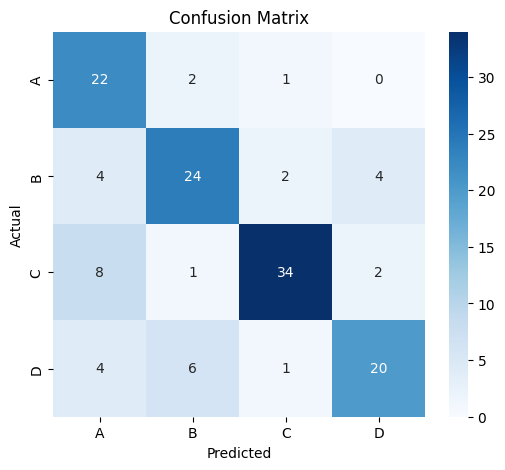

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(df_final["Correct Option"], df_final["llm_option"], labels=["A", "B", "C", "D"])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["A", "B", "C", "D"], yticklabels=["A", "B", "C", "D"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [100]:
from sklearn.metrics import roc_auc_score

# Convert to binary: 1 if correct, 0 if incorrect
df_final["correct_binary"] = (df_final["Correct Option"] == df_final["llm_option"]).astype(int)

# Compute ROC-AUC score
roc_auc = roc_auc_score(df_final["correct_binary"], df_final["correct_binary"])
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 1.00


In [108]:
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_sm-0.5.4.tar.gz

In [130]:
import json
import time
from typing import Dict, Optional, List, Set, Tuple
import scispacy
import spacy

# Load the scientific/medical NER model
nlp = spacy.load("en_core_sci_sm")

def extract_medical_entities(text: str) -> List[Dict[str, str]]:
    """
    Extract medical entities and their labels from text using scispacy.

    Args:
        text (str): Input text to process

    Returns:
        List[Dict[str, str]]: List of dictionaries containing entity text and label
    """
    doc = nlp(text)
    # Extract entities with their labels
    return [{"text": ent.text.lower(), "label": ent.label_} for ent in doc.ents]

def get_medical_entities_from_question(data: Dict) -> List[Dict[str, str]]:
    """
    Extract medical entities and their labels from both question and options.

    Args:
        data (Dict): Dictionary containing 'Question' and 'Options'

    Returns:
        List[Dict[str, str]]: List of unique entities with their labels
    """
    entities = []
    seen_entities = set()  # To track unique text-label combinations

    # Helper function to add unique entities
    def add_unique_entities(new_entities):
        for entity in new_entities:
            entity_tuple = (entity["text"], entity["label"])
            if entity_tuple not in seen_entities:
                seen_entities.add(entity_tuple)
                entities.append(entity)

    # Process question
    question_entities = extract_medical_entities(data['Question'])
    add_unique_entities(question_entities)

    # Process each option
    for option_text in data['Options'].values():
        option_entities = extract_medical_entities(option_text)
        add_unique_entities(option_entities)

    return entities

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [142]:
sampq = dft.iloc[0].data

In [143]:
sampq

{'Correct Answer': 'paralysis of the facial muscles.',
 'Correct Option': 'A',
 'Options': {'A': 'paralysis of the facial muscles.',
  'B': 'paralysis of the facial muscles and loss of taste.',
  'C': 'paralysis of the facial muscles, loss of taste and lacrimation.',
  'D': 'paralysis of the facial muscles, loss of taste, lacrimation and decreased salivation.'},
 'Question': 'A lesion causing compression of the facial nerve at the stylomastoid foramen will cause ipsilateral'}

In [144]:
ent = get_medical_entities_from_question(sampq)

In [145]:
ent

[{'text': 'lesion', 'label': 'ENTITY'},
 {'text': 'compression', 'label': 'ENTITY'},
 {'text': 'facial nerve', 'label': 'ENTITY'},
 {'text': 'stylomastoid foramen', 'label': 'ENTITY'},
 {'text': 'ipsilateral', 'label': 'ENTITY'},
 {'text': 'paralysis', 'label': 'ENTITY'},
 {'text': 'facial muscles', 'label': 'ENTITY'},
 {'text': 'loss of taste', 'label': 'ENTITY'},
 {'text': 'lacrimation', 'label': 'ENTITY'},
 {'text': 'decreased', 'label': 'ENTITY'},
 {'text': 'salivation', 'label': 'ENTITY'}]

In [115]:
sampq

{'Options': {'A': 'internal laryngeal nerve which is the afferent limb of the cough reflex.',
  'B': 'external laryngeal nerve which is the afferent limb of the gag reflex.',
  'C': 'internal laryngeal nerve which is the afferent limb of the gag reflex.',
  'D': 'external laryngeal nerve which is the afferent limb of the cough reflex.'},
 'Question': 'The mucosa of the upper larynx is innervated by the'}

In [ ]:
import json
import time
from typing import Dict, Optional, List, Set, Tuple
import spacy

# Load the scientific/medical NER model
nlp = spacy.load("en_core_sci_sm")

def extract_medical_entities(text: str) -> List[Dict[str, str]]:
    """
    Extract medical entities and their labels from text using scispacy.

    Args:
        text (str): Input text to process

    Returns:
        List[Dict[str, str]]: List of dictionaries containing entity text and label
    """
    doc = nlp(text)
    # Extract entities with their labels
    return [{"text": ent.text.lower(), "label": ent.label_} for ent in doc.ents]

def get_medical_entities_from_question(data: Dict) -> List[Dict[str, str]]:
    """
    Extract medical entities and their labels from both question and options.

    Args:
        data (Dict): Dictionary containing 'Question' and 'Options'

    Returns:
        List[Dict[str, str]]: List of unique entities with their labels
    """
    entities = []
    seen_entities = set()  # To track unique text-label combinations

    # Helper function to add unique entities
    def add_unique_entities(new_entities):
        for entity in new_entities:
            entity_tuple = (entity["text"], entity["label"])
            if entity_tuple not in seen_entities:
                seen_entities.add(entity_tuple)
                entities.append(entity)

    # Process question
    question_entities = extract_medical_entities(data['Question'])
    add_unique_entities(question_entities)

    # Process each option
    for option_text in data['Options'].values():
        option_entities = extract_medical_entities(option_text)
        add_unique_entities(option_entities)

    return entities

def get_valid_llm_response(question: Dict, max_retries: int = 3, delay: float = 1.0) -> Optional[Dict]:
    """
    Get valid LLM response with medical entity context.

    Args:
        question (Dict): The question dictionary to send to LLM
        max_retries (int): Maximum number of retry attempts
        delay (float): Delay in seconds between retries

    Returns:
        Dict or None: Parsed JSON response if successful, None if all retries fail
    """
    # Extract medical entities with labels
    medical_entities = get_medical_entities_from_question(question)

    # Here you can use the medical_entities to get additional context from your external API
    # external_context = get_external_context(medical_entities)  # You would implement this

    for attempt in range(max_retries):
        try:
            # Get response from LLM
            response = get_llm_res(question)  # Add context when ready

            # Try to parse JSON
            parsed_response = json.loads(response)

            # Verify required keys exist
            if "Correct Option" in parsed_response:
                return parsed_response

        except json.JSONDecodeError:
            print(f"Attempt {attempt + 1}: Invalid JSON received")
        except KeyError:
            print(f"Attempt {attempt + 1}: Response missing required keys")
        except Exception as e:
            print(f"Attempt {attempt + 1}: Unexpected error: {str(e)}")

        if attempt < max_retries - 1:
            time.sleep(delay)

    return None

# Process the dataframe
llm_answers = []

for index, row in dfq.iterrows():
    ques = row.data
    # Extract medical entities for debugging/monitoring
    entities = get_medical_entities_from_question(ques)
    print(f"Medical entities found:")
    for entity in entities:
        print(f"- {entity['text']} ({entity['label']})")

    response = get_valid_llm_response(ques, delay=2.0)

    if response:
        llm_answers.append({
            "id": row.id,
            "llm_option": response["Correct Option"],
            "medical_entities": entities  # Store entities with labels
        })
    else:
        print(f"Failed to get valid response for question ID: {row.id}")
        llm_answers.append({
            "id": row.id,
            "llm_option": None,
            "medical_entities": entities
        })